<a href="https://colab.research.google.com/github/rishika-p/-NNDL-/blob/main/Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import math

In [24]:
data = pd.read_excel("/content/slr09.xls")
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [5]:
data.describe()

,X,Y
count,34.000000,34.000000
mean,7.661765,142.794118
std,0.501522,55.787356
min,6.700000,35.000000
25%,7.300000,107.000000
50%,7.600000,147.000000
75%,8.000000,186.500000
max,8.800000,262.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       34 non-null     float64
 1   Y       34 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes


In [26]:
z = np.abs(stats.zscore(data))
print(z)

[[0.12500664 0.25847285]
 [1.13696519 0.56778404]
 [1.08934361 0.58597881]
 [0.32739835 0.8225109 ]
 [0.52979006 0.51319971]
 [0.27977677 0.00374598]
 [0.73218177 1.3501594 ]
 [0.68456019 0.85890045]
 [1.13696519 0.01444879]
 [0.32739835 0.85890045]
 [0.8869519  1.31376985]
 [1.3393569  1.02265344]
 [0.73218177 2.16892432]
 [0.27977677 0.6876555 ]
 [0.73218177 0.39653909]
 [0.68456019 1.12433013]
 [1.69651874 1.10613535]
 [1.13696519 1.22279597]
 [1.08934361 1.07723776]
 [0.48216848 0.22208329]
 [0.12500664 0.25847285]
 [2.30369386 0.07652509]
 [0.93457348 0.17820178]
 [0.48216848 1.63378385]
 [0.8869519  1.57919952]
 [0.07738507 0.5420973 ]
 [1.49412703 1.96128982]
 [0.52979006 0.32375998]
 [0.73218177 1.21530401]
 [1.69651874 1.72475773]
 [0.27977677 0.07652509]
 [1.94653203 0.46931819]
 [1.13696519 0.71334225]
 [0.73218177 1.01516147]]


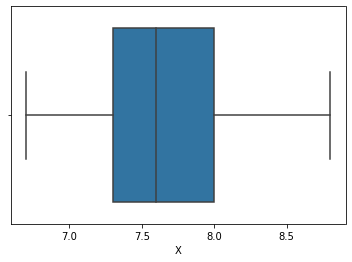

In [27]:
sns.boxplot(x=data['X'])

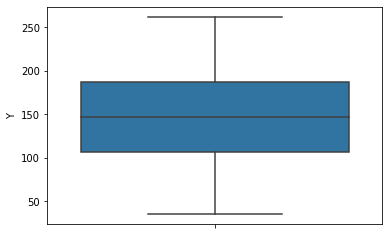

In [28]:
sns.boxplot(y=data['Y'])

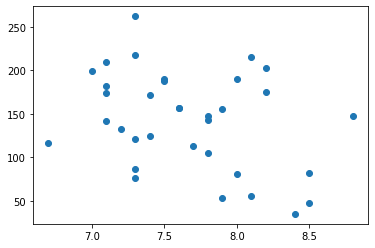

In [29]:
plt.scatter(data.iloc[:,0],data.iloc[:,1])

In [31]:
data = df_filtered
print(len(data))
print(len(df_filtered))
if(len(data) == len(df_filtered)):
    print('No outliners')

32
32
No outliners


In [30]:
f_data = data[(z < 3).all(axis=1)]
f_data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [32]:
df = data
for i in df:
    q = df[i].quantile(0.99)
    df[df[i] < q]
    q_low = df[i].quantile(0.01)
    q_hi  = df[i].quantile(0.99)

    df_filtered = df[(df[i] < q_hi) & (df[i] > q_low)]
df_filtered.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [33]:
data_n = data.copy()
data_n = (data_n - data_n.min())/(data_n.max() - data_n.min())
data_n.head()

,X,Y
0,0.428571,0.644970
1,0.190476,0.745562
2,0.714286,0.751479
3,0.380952,0.828402
4,0.333333,0.727811


In [34]:
train_data,test_data = train_test_split(data_n,test_size=0.1)
print(len(train_data))
train_data.head()

28


,X,Y
31,0.000000,0.408284
19,0.571429,0.633136
21,1.000000,0.585799
9,0.380952,0.840237
33,0.285714,0.230769


In [35]:
xa = np.array(train_data['X'])
ya = np.array(train_data['Y'])

In [48]:
from sympy import Symbol, Derivative, symbols
m= Symbol('m')
c= Symbol('c')
function = '0.5*(y-m*x-c)**2'
partial_derivative= Derivative(function, m)
derivative_function_of_m = partial_derivative.doit()
partial_derivative= Derivative(function, c)
derivative_function_of_c = partial_derivative.doit()
print(f'first order derivative d/dm = {derivative_function_of_m} ,d/dc = {derivative_function_of_c}')
err = []
m1 = -1.0 
c1 = 1.0  
itr = 100  
learning_rate = 0.1 
for i in range(0,itr):
    er =0
    for j in range(0,len(xa)):
        er +=  ((ya[j] - (m1 * xa[j]) - c1))**2
        m = symbols('m')
        c = symbols('c')
        x = symbols('x')
        y = symbols('y')
        derivative_function_of_m_v = derivative_function_of_m.subs(m, m1) 
        derivative_function_of_m_v = derivative_function_of_m_v.subs(c, c1) 
        derivative_function_of_m_v = derivative_function_of_m_v.subs(x, xa[j]) 
        derivative_function_of_m_v = derivative_function_of_m_v.subs(y, ya[j]) 
        derivative_function_of_m_v = round(derivative_function_of_m_v,2)
        derivative_function_of_c_v = derivative_function_of_c.subs(c, c1) 
        derivative_function_of_c_v = derivative_function_of_c_v.subs(m, m1) 
        derivative_function_of_c_v = derivative_function_of_c_v.subs(x, xa[j]) 
        derivative_function_of_c_v = derivative_function_of_c_v.subs(y, ya[j]) 
        derivative_function_of_c_v = round(derivative_function_of_c_v,2)
        dm = (-1.0)*learning_rate*derivative_function_of_m_v
        dc = (-1.0)*learning_rate*derivative_function_of_c_v
        m1 = m1 + dm
        m1 = round(m1, 2) 
        c1 = c1 + dc
        c1 = round(c1, 2)

        er = (1/(2*len(train_data['X'])))*(er)
        err.append(er)
print(m1, c1)
print(f'minimum value obtained at m = {m1} ,c ={c1} for given function')

first order derivative d/dm = -1.0*x*(-c - m*x + y) ,d/dc = 1.0*c + 1.0*m*x - 1.0*y
-0.66 0.96
minimum value obtained at m = -0.66 ,c =0.96 for given function


In [49]:
train_data_pred =  m1*train_data['X'] + c1
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train_data['Y'],train_data_pred)
mse

0.08941256881543999

Text(0.5, 1.0, 'predicted data vs actual data')

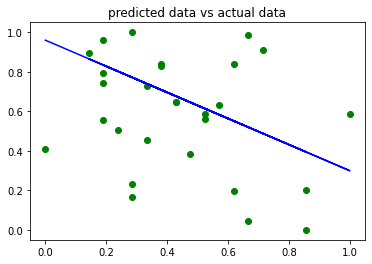

In [51]:
plt.plot(np.array(train_data['X']),np.array(train_data_pred),'blue')
plt.scatter(np.array(train_data['X']),np.array(train_data['Y']),color='green')
plt.title('predicted data vs actual data')

In [52]:
x_min = data['X'].min()
x_max = data['X'].max()
y_min = data['Y'].min()
y_max = data['Y'].max()
x =x1 = float(input("enter pH value of well water :"))
x = (x - x_min)/(x_max - x_min)
y = m1*x + c1
y = y*(y_max - y_min) + y_min
print(f"bicarbonates of well water based on its pH {x1} is : {y}")

enter pH value of well water :7.2
bicarbonates of well water based on its pH 7.2 is : 183.669968377976
